In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt
%run Cointegration2.py
#import Cointegration2 as inter

In [65]:
path_data_cart = 'datasets/data_cart.csv'

In [66]:
data = pd.read_csv(path_data_cart, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs2.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

18/04/2019 to 02/07/2020
data: (300, 71)
pairs: (1899, 12)


In [67]:
pairs.loc[(pairs['Dependent']=='USIM5')]

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
1891,100,USIM5,VALE3,0.022404,95,0.308060,4,0.704014,0.864725,Short/Long,1,100
1892,250,USIM5,VIVT4,0.006614,99,0.314767,10,0.402918,1.131376,Short/Long,9,"100,120,140,160,180,200,220,240,250"
1893,250,USIM5,VVAR3,0.036239,95,0.469540,10,0.647053,0.058956,Long/Short,8,"100,120,140,160,180,200,240,250"
1894,250,USIM5,WEGE3,0.017265,95,0.283155,11,0.459567,0.417122,Long/Short,6,"160,180,200,220,240,250"


In [68]:
pairs

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,ABEV3,AZUL4,0.018109,95,0.117062,9,0.615910,1.124665,Short/Long,4,"100,220,240,250"
1,100,ABEV3,B3SA3,0.000230,99,0.235832,2,0.628383,0.275412,Long/Short,1,100
2,240,ABEV3,BBAS3,0.046590,95,0.220007,9,0.552417,0.889388,Short/Long,6,"100,160,180,200,220,240"
3,250,ABEV3,BBDC3,0.049430,90,0.342484,11,0.579072,0.894757,Short/Long,8,"100,120,140,160,180,200,220,250"
4,250,ABEV3,BBDC4,0.030424,95,0.349573,11,0.564318,0.781056,Short/Long,9,"100,120,140,160,180,200,220,240,250"
...,...,...,...,...,...,...,...,...,...,...,...,...
1894,250,USIM5,WEGE3,0.017265,95,0.283155,11,0.459567,0.417122,Long/Short,6,"160,180,200,220,240,250"
1895,100,VALE3,VIVT4,0.020266,95,1.331572,5,0.494147,0.097942,Long/Short,1,100
1896,250,VALE3,VVAR3,0.038695,95,1.138446,10,0.533416,0.406829,Short/Long,5,"100,200,220,240,250"
1897,240,VIVT4,VVAR3,0.043523,95,0.699206,11,0.437329,0.825008,Long/Short,6,"100,120,140,160,200,240"


In [69]:
pairs_signal = pairs.loc[(pairs['Signal'] >= 0.95)].copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal.shape

(341, 12)

In [70]:
pairs_signal = pairs_signal.loc[(pairs_signal['PeriodQt'] >= 5)].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,CYRE3,LREN3,0.000057,99,0.839978,4,0.786677,1.487075,Short/Long,9,"100,120,140,160,180,200,220,240,250"
1,250,TAEE11,USIM5,0.000012,99,0.897740,4,0.486419,1.034950,Long/Short,9,"100,120,140,160,180,200,220,240,250"
2,250,CSAN3,MULT3,0.000014,99,1.980158,4,0.699671,1.565390,Short/Long,9,"100,120,140,160,180,200,220,240,250"
3,250,CSAN3,IGTA3,0.000019,99,1.257714,4,0.720665,1.289733,Short/Long,9,"100,120,140,160,180,200,220,240,250"
4,250,CPFE3,RENT3,0.000018,99,0.421309,4,0.619016,1.372272,Long/Short,9,"100,120,140,160,180,200,220,240,250"
...,...,...,...,...,...,...,...,...,...,...,...,...
221,250,B3SA3,EGIE3,0.045775,95,0.624567,13,0.651936,1.287015,Short/Long,5,"100,120,220,240,250"
222,250,ELET6,TAEE11,0.032493,95,2.142004,13,0.596208,0.988036,Short/Long,9,"100,120,140,160,180,200,220,240,250"
223,250,ELET3,VIVT4,0.030594,95,0.667090,14,0.436963,1.074701,Short/Long,7,"100,120,140,180,220,240,250"
224,250,ELET3,MULT3,0.039956,95,0.698206,14,0.610529,1.150144,Short/Long,8,"100,120,140,160,180,220,240,250"


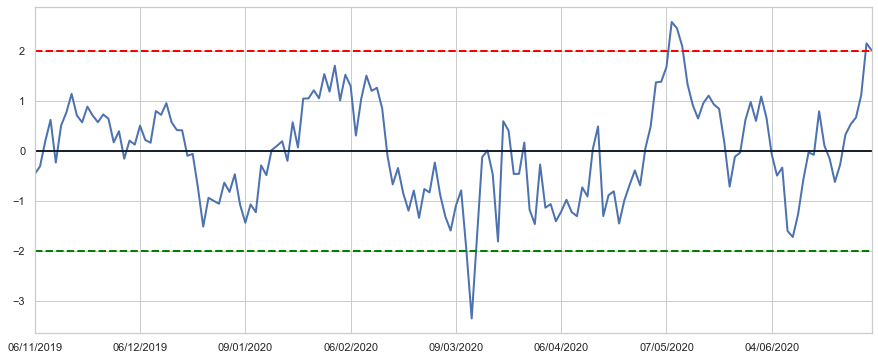

In [72]:
plot_residue(residue(data['CSAN3'], data['IGTA3'], 160))

In [75]:
analysis_by_periods(data['CSAN3'], data['IGTA3'])

,Period,Stationary,Dickey-Fuller,ADF,Beta,HalfLife,Corr
0,100,True,0.012141,95,1.345781,3,0.764848
1,120,True,0.004751,99,1.387981,3,0.759870
2,140,True,0.001779,99,1.363024,4,0.754555
3,160,True,0.000573,99,1.322280,4,0.748972
4,180,True,0.000171,99,1.312918,4,0.745063
5,200,True,0.000131,99,1.296951,4,0.736178
6,220,True,0.000032,99,1.282254,4,0.728056
7,240,True,0.000015,99,1.267180,4,0.723555
8,250,True,0.000019,99,1.257714,4,0.720665
